# 数据科学分析(包括建模、预测)

## 基本流程

Data Science Solutions book 这本书为类似 Kaggle 网站上解决数据科学竞赛问题，提供了一个典型的分析流程：

- 定义问题
- 获取训练数据以及测试数据
- 加工、准备以及清洗数据
- 分析、识别数据的模式，并对数据做可视化
- 建模、预测，并解决问题
- 对结果做可视化，生成报告，并且展示问题的解决步骤和最终的解决方案
- 提交结果

现实情况下，不会严格遵循以上流程：

- 可能会结合多个步骤。例如，在分析过程中就开始用可视化
- 提前执行某个步骤。例如,数据加工前后都会对数据进行分析
- 多次执行某个步骤。例如，多次对数据进行可视化
- 完全弃用一个步骤。例如在非竞赛场合可能并不需要做提交结果的步骤

## 流程目标

主要有7个目标：

- **分类**：可能要对我们的样本进行分类。我们可能也希望了解不同类和我们的目标之间的关联。
- **相互性**：我们可以根据训练集里可用的特征来解决一个问题。那到底在数据集里的哪些特征会对解决问题起着至关重要的作用呢？从统计学上来说，是否在某个特征与问题的解之间存在某种联系？如果这个特征的值改变后，相应问题的解是否也会改变呢？反过来的情况是否也是如此呢？这个可以通过对数据集里的数值型以及离散型的特征做测试来得到。我们可能也希望得到特征之间的关系，而不是直接得到特征与问题解之间的关系。找到一些特定属性之间的关联性可能会在创建、补全以及修正特征上起到一定作用
- **转换**：对于建模阶段，我们需要去对数据进行预处理。根据模型的算法，可能需要将特征值全部转化为数字值。例如把文本特征值转化为数字值。
- **填缺**：数据的准备工作中可能也需要我们去估计一些特征的缺失值，当没有缺失值时，模型算法可能效果最好。
- **修正**：我们也可以去分析数据集中的错误以及可能存在的异常特征值，从而去修正这些包含错误值的样本。一种方法是检测样本或特征中的异常值。如果一个特征不适合分析，或者会严重影响结果，我们也可以完全舍弃掉它。
- **创造**：我们可以根据已存在的特征或者特征序列来创建新的特征，使得新特征符合相关性、转换以及完整性目标
- **制图**：如何根据原数据集以及要解决问题，对数据做合适的可视化图 


# 基础数据分析(剔除建模、预测)


## 概念
数据分析是指用适当的方法与工具，对收集来的大量数据进行分析，提取其中有意义的信息，从而形成有价值的结论的过程。

## 流程

在进行数据分析之前，我们需要清楚数据分析的基本流程。

* 明确需求与目的
* 数据收集
    + 内部数据
    + 购买数据
    + 爬取数据
    + 调查问卷
* 数据预处理
    + 数据清洗
        - 缺失值
        - 异常值
        - 重复值
    + 数据转换
* 数据分析
    + 数据建模
    + 数据可视化
* 编写报告


## 理解流程
我们可以进行一个类比，比如，我们现在要做出一道菜肴，那我们需要进行怎样的流程呢？
* 确定做菜
* 买菜
* 洗菜
* 切菜
* 炒菜
* 盛菜
* 写日记

接下来，我们就可以将做菜的流程步骤去对应理解数据分析的步骤。

做菜步骤 | 数据分析步骤  
-|-
确定做菜 | 明确需求与目的
买菜 | 数据收集
洗菜 | 数据清洗
切菜 | 数据转换
炒菜 | 数据分析
盛菜 | 数据可视化
写日记 | 编写报告


## 定义问题


“在训练数据中，提供了在泰坦尼克号上乘客的具体数据以及他们是否在那次灾难中存活的信息。参赛者能否通过已有的训练数据训练出一个模型，此模型需要根据输入的测试数据里乘客信息，来预测此乘客是否能在灾难中存活”

我们可能也想要通过问题描述获取更多有关此问题的信息。在此问题的描述中，比较有意义的描述如下：
    - 泰坦尼克号在1912年4月15日与冰山碰撞后沉没。在一共2224名乘客与船员里，有1502人不幸逝世。这个信息即表明了此次事件中生还率为32%。
    - 一个使得在这次灾难中有如此之大死亡率的原因是：在船上没有足够的救生船提供给乘客以及船员
    - 尽管在此次灾难中生还存在运气的成分，但是仍旧会有些群体的生还率高于其他人，如女人、小孩，以及上等仓的人

## 代码实现
### 导入相关库

导入需要的库，同时，进行一些初始化的设置。

In [1]:
import numpy as np  # 科学计算工具包
import pandas as pd  # 数据分析工具包
import matplotlib.pyplot as plt # 图表绘制工具包
import seaborn as sns # 基于 matplot, 导入 seaborn 会修改默认的 matplotlib 配色方案和绘图样式，这会提高图表的可读性和美观性

# 算法库
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

# 在 jupyter notebook 里面显示图表
%matplotlib inline 

### 获取数据集

读取参数指定的文件，返回一个DataFrame类型的对象。

有两个数据集：训练集和测试集。 我们将使用训练集来构建我们的预测模型，用测试集来对其进行评分并生成输出文件以在Kaggle评估系统上提交。

In [2]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

### 探索性数据分析

开始探索数据，带着问题去理解数据。

通过以下的属性和方法了解数据
+ 属性
    + `df.columns.value` 数据集中所有列名(特征),numpy.ndarray 类型
+ 方法
    + `df.head()`  预览数据集前5行
    + `df.tail()`  预览数据集后5行
    + `df.info()`  显示大致数据信息，包括每列名称，非空值数量，每列的数据类型，内存占用等信息。
    + `df.describe()` 展示数据的一些描述性统计信息,但会过滤掉缺失值。默认只统计数值类型的字段内容。
        - `describe(include=‘ALL‘)`,统计所有类型的数据
        - `describe(include=[np.number])` 只统计数值类型的字段内容：count计数，mean平均数，std方差，min最小值，四分位数，max 最大值
        - `describe(include=[np.object])` 只统计object类型的字段内容
        - `describe(include=‘O’) 只统计字符串类型的字段内容：count计数，unique唯一值数量，top出现频率最高的内容，freq最高出现频率
        - `describe(percentiles=[])`:设置输出的百分位数，默认为[.25，.5，.75]，返回第25，第50和第75百分位数。

#### 预览数据 

- `df.head()` 预览数据集前5行

In [7]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Survived 列是目标变量，这是我们要预测的变量。** 如果 Survived 为 1，乘客幸免于难，为 0，表示未存活。

Survived |  是否存活
-|-
0 | 死亡
1 | 存活

其他描述乘客的变量，是**特征**。

数据特征 | 意思  
-|-
PassengerId | 乘客ID
Pclass | 乘客等级(1,2,3)
Name | 乘客姓名
Sex | 乘客性别 (Female,Male)
Age | 乘客年龄
SibSp | 与乘客同行的兄弟姐妹和配偶的数量
Parch | 与乘客同行的父母和孩子的数量
Ticket | 船票号码
Fare | 票价
Cabin | 船舱号码
Embarked | 乘客登船港口(C = Cherbourg, Q = Queenstown, S = Southampton)


#### 数据集的大致信息

`df.info()` 显示大致数据信息，包括每列名称，非空值数量，每列的数据类型，内存占用


In [10]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Passenger

* 训练数据集
    - 行数 ： 891个样本大小
    - 列数 ：12（11个特征+1个**目标变量 Survived**）
    - 数据类型 ： 7个特征是整数或浮点数，5个特征是字符串
    - 缺失值情况 ：Cabin > Age > Embarked  (数量从大到小排序)
    - 数值型数据 ：PassengerId，Age，Fare,SibSp,Parch
    - 类别数据 ：Survived,Sex,Embarked,Pclass
    - 混合型数据：Ticket,Cabin 

* 测试数据集
    - 列数 ：11个特征
    - 数据类型 ： 6个特征是整数或浮点数，5个特征是字符串
    - 缺失值情况 ：Cabin > Age > Fare (数量从大到小排序)

------

**知识点**
* **类别数据(定性数据)**

    数据被划分为各种类别，用以描述某类得性质或特征。因此，类别数据也称为定性数据。游戏种类就是定性数据的一个实例 —— 每种游戏种类形成一个独立的类别。关于定性数据，请记住一个重点：不能将数据值理解为数字。
    

* **数值型数据(定量数据)**

    数值型数据不同，它所涉及的是数字。数值型数据中的数值具有数字的意义，但还涉及计量或计数。由于数值型数据描述的是数量，所以也称为定量数据。

------

#### 数据集的描述性统计信息

`df.describe()` 返回数据数值情况，数值数据的字段内容：count计数，mean平均数，std方差，min最小值，四分位数，max 最大值 

In [11]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


- Survied 的均值为 0.383838，而 survied 值只有0或1，说明这个均值反应了存活率。
    + 样本存活率约38%，实际存活率为32%(2224-1502/2224=32.4%)
    
从目前来看，要注意几点。

- 需要将非数值型特征转换为数值型特征，以便机器学习算法后期处理。
- 这些特征的范围有很大的差异，需要将其转换为大致相同的尺度。
- 一些特征包含缺失值（NaN = 不是数字），们需要处理。

#### 数据集缺失值详情

- `df.isnull()` 返回表明哪些值是缺失值的布尔值
- `df.notnull()` 返回表明哪些值不是缺失值的布尔值
- `df.dropna()` 根据每个标签的值是否是缺失数据来筛选轴标签，并根据允许丢失的数据量来确定阀值
- `df.sort_values()` 排序，ascending = False表示降序
- `pd.concat([])` 使对象在轴向上进行粘合或“堆叠“，默认是沿着 axis=0(行) 的轴向。axis=1 表示(列)的轴向。
- `round(x[, n])` 方法返回浮点数x的四舍五入值,n小数点位数

In [24]:
train_total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum()/train_df.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
train_miss_data = pd.concat([train_total,percent_2],axis=1,keys=['total','%'])
train_miss_data.head()

,total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
Fare,0,0.0
Ticket,0,0.0


In [28]:
test_total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum()/test_df.isnull().count()*100
percent_2 = round(percent_1,1).sort_values(ascending=False)
test_miss_data = pd.concat([test_total,percent_2],axis=1,keys=['total','%'])
test_miss_data.head()

,total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
Embarked,0,0.0
Ticket,0,0.0


* 训练数据集
    + Embarked 特征只有2个缺失的值，可以很容易地填补。
    + Age 特征就比较麻烦了，因为它有177个缺失值。
    + Cabin 特征需要进一步调查，但看起来可能要从数据集中删除它，因为缺失值比例高达 77%。
* 测试数据集
    + Fare 特征只有2个缺失的值，可以很容易地填补。
    + Age 特征有86个缺失值。
    + Cabin 特征需要进一步调查，但看起来可能要从数据集中删除它，因为缺失值比例高达 78.2%。
    
#### 假设

**哪些特征可能和存活有关？**

In [30]:
train_df.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

初步判断，除了PassengerId、Ticket和 Name之外,其他特征都可能与存活有关。

##### 1. Age and Sex:

* 首先将数据按照性别(Female, Male)划分 
* 基于性别，再根据存活状态(Survived,Not_Survived)划分 
* 就会有四种搭配
        - Female & Survived
        - Female & Not_Survived
        - Male & Survived
        - Male & Not_Survived
* 鉴于 Age 特征有缺失值，在此处可视化分析时，去除 Age 的缺失值

In [11]:
# 按性别筛选出数据
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']

# 在性别的基础上筛选出存活和未存活的数据

# 选出存活的数据
F_survived = women[women['Survived']==1]
M_survived = men[men['Survived']==1]

# 选出未存活的数据
F_not_surv = women[women['Survived']==0]
M_not_surv = men[men['Survived']==0]

F_survived.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


求某一列的缺失值情况

由于 Dataframe 数据中选择某一列的方式有 (按照字典型标记或属性那样检索为 Series)
    - df.A 的属性方式
    - df['A'] 的方式
所以求某一列的缺失值情况也有两种
    - df.A.isnull().sum()
    - df['A'].isnull().sum()

根据某一列去除缺失值
    - df.A.isnull().dropna()
    - df['A'].isnull().dropna()

In [9]:
# 每种数据去除 Age 缺失值
print('去除前，Female survived null', F_survived.Age.isnull().sum())

# 去除 Age 缺失值
F_survived.Age.dropna()
M_survived.Age.dropna()
F_not_surv.Age.dropna()
M_not_surv.Age.dropna()

print('取出后，Female survived null',F_survived.Age.dropna().isnull().sum())

去除前，Female survived null 36
取出后，Female survived null 0


----
**知识点**

displot()集合了matplotlib的hist()与核函数估计kdeplot的功能，增加了rugplot分布观测条显示与利用scipy库fit拟合参数分布的新颖用途。具体用法如下：：

```
seaborn.distplot(a, bins=None, hist=True, kde=True, rug=False, fit=None, hist_kws=None, kde_kws=None, rug_kws=None, fit_kws=None, color=None, vertical=False, norm_hist=False, axlabel=None, label=None, ax=None)
```
    - 参数 ax：选择位置
    - 参数 hist、kde，调节是否显示直方图及核密度估计(默认hist,kde均为True)

---

问题：直方图中参数 bins，这里是根据什么设置的?

----


Text(0.5, 1.0, 'Male')

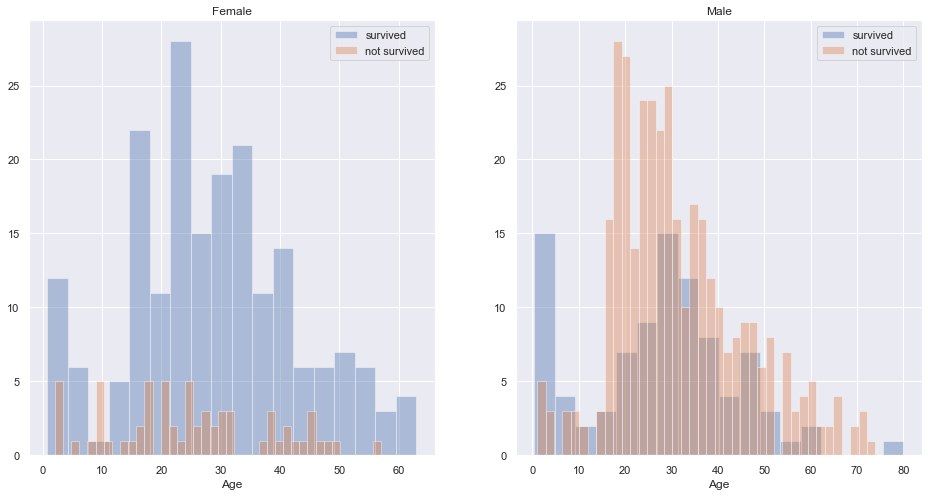

In [37]:
sns.set() # 声明使用 Seaborn 样式

fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(16,8)) # 创建一个 Figure, 子图为1行，2列
survived = 'survived' # 图例 label 
not_survived = 'not survived' # 图例 label

ax = sns.distplot(F_survived.Age.dropna(),bins=18,ax=axes[0],kde=False)
ax = sns.distplot(F_not_surv.Age.dropna(),bins=40,ax=axes[0],kde=False)
ax.legend([survived,not_survived]) # 图例 label 放置位置1
ax.set_title('Female')

ax = sns.distplot(M_survived.Age.dropna(),bins=18,ax=axes[1],label=survived,kde=False) # 图例 label 放置位置2
ax = sns.distplot(M_not_surv.Age.dropna(),bins=40,ax=axes[1],label=not_survived,kde=False)
ax.legend()
ax.set_title('Male')

可以看出

- 对于男性来说，大概20岁到35岁之间的存活率较高的；5岁到18岁之间的存活概率很低，
- 对于女性来说，大概15岁到40岁之间的存活概率更高
- 无论男女，婴儿的存活概率会高一点。

因为似乎有一些特定的年龄段，存活几率会增加。

##### 2. Embarked, Pclass and Sex

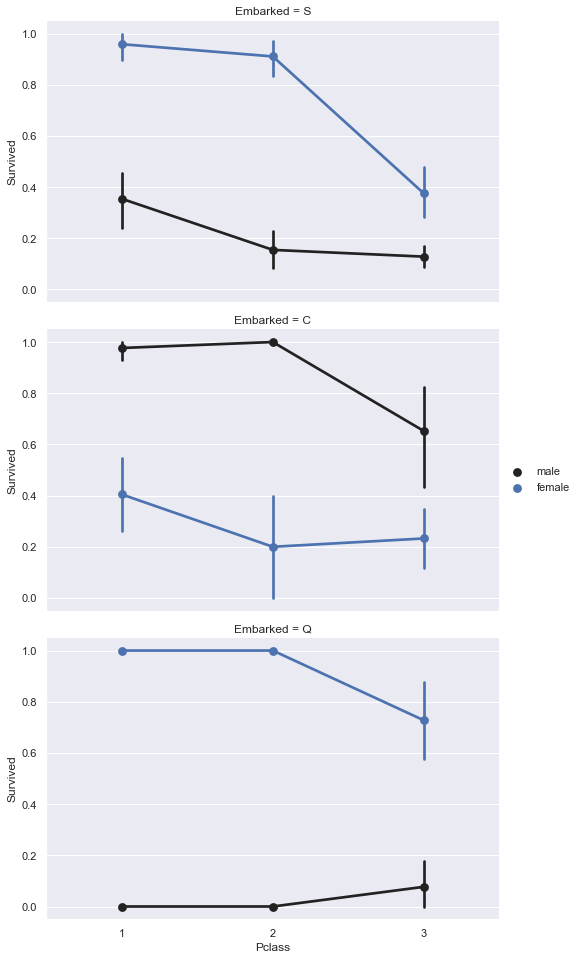

In [40]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

In [ ]:
从性别来看，登船港口似乎与存活率有关。

在Q和S港口登船的女性乘客，存活率高于男性。
在C港口登船，男性乘客的存活率率高，但如果在Q港或S港，存活率率低。


